In [21]:
import pandas as pd
import numpy as np

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read in the CSV
df = pd.read_csv('lyrics_2010.csv')

In [3]:
#Identify all of the different genres
df['genre'].unique()

array(['Pop', 'Rock', 'Folk', 'Not Available', 'Hip-Hop', 'Electronic',
       'Jazz', 'Other', 'Metal', 'Country', 'Indie', 'R&B'], dtype=object)

In [46]:
#make a new column with the genre either being Hip-Hop or Other
#Combine all genres that aren't Hip-hop into Other
df['genre_combine'] = np.where(
    (df['genre'] == 'Jazz')|
    (df['genre'] == 'Indie')|
    (df['genre'] == 'R&B')|
    (df['genre'] == 'Folk')|
    (df['genre'] == 'Rock')|
    (df['genre'] == 'Electronic')|
    (df['genre'] == 'Metal')|
    (df['genre'] == 'Pop')|
    (df['genre'] == 'Not Available'), 
    'Other', 
    df['genre']
    )

In [41]:
df['genre_combine'].unique()

array(['Pop', 'Other', 'Hip-Hop', 'Country'], dtype=object)

In [6]:
df.head()

,Unnamed: 0,index,song,year,artist,genre,lyrics,genre_combine
0,197321,197321,love-will-come-back-again,2016,chaz-robinson,Pop,Verse The price of your soul is the final goa...,Pop
1,245368,245368,paralyzed,2016,failure-anthem,Rock,"Floating away, drift into a distance watching ...",Rock
2,139503,139503,clearly,2016,cilia,Pop,Now i'm done following your lead to try to wal...,Pop
3,298974,298974,gotta-let-go,2016,earl,Folk,I let a song go out of my heart It was the swe...,Other
4,131589,131589,guns-of-umpqua,2016,drive-by-truckers,Rock,I see a bird soar through the clouds outside m...,Rock


In [50]:
#Verify that the genres are either Hip-Hop or Other
df['genre_combine'].unique()

array(['Other', 'Hip-Hop', 'Country'], dtype=object)

In [47]:
#Split the data into a test set and a train set
train_df, test_df = train_test_split(df)

In [48]:
#Using Multinomial Naive Bayes because it's a good method for text classification
text_clf = Pipeline(
        [('vect', TfidfVectorizer()),
         ('clf', MultinomialNB()),
        ])

# train the model
text_clf.fit(train_df.lyrics, train_df.genre_combine)  

# score the model
predicted = text_clf.predict(test_df.lyrics)

#this is the accuracy of the model
np.mean(predicted == test_df.genre_combine)

0.8337070480576935

In [49]:
#Using Linear Support Vector Machines (SVM) as it's regarded as one of the best text classifier algorithms
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline(
    [('vect', TfidfVectorizer()),
        ('clf', SGDClassifier()),
    ])


# train the model
text_clf.fit(train_df.lyrics, train_df.genre_combine)  

# score the model
predicted = text_clf.predict(test_df.lyrics)

np.mean(predicted == test_df.genre_combine)

C:\Users\kylel\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8842494394279135

In [53]:
genres = ['Other', 'Hip-Hop', 'Country']

In [58]:
train_df.shape

(49503, 8)

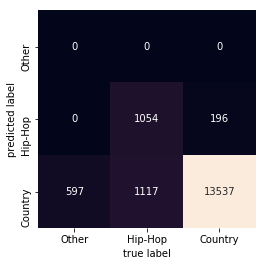

In [52]:
mat = confusion_matrix(test_df.genre_combine, predicted)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=genres, 
    yticklabels=genres
)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [12]:
precision, recall, fscore, support = precision_recall_fscore_support(test_df.genre_combine, predicted)

for n,genre in enumerate(genres):
    genre = genre.upper()
    print(genre+'_precision: {}'.format(precision[n]))
    print(genre+'_recall: {}'.format(recall[n]))
    print(genre+'_fscore: {}'.format(fscore[n]))
    print(genre+'_support: {}'.format(support[n]))
    print()

HIP HOP_precision: 0.0
HIP HOP_recall: 0.0
HIP HOP_fscore: 0.0
HIP HOP_support: 586

OTHER_precision: 0.0
OTHER_recall: 0.0
OTHER_fscore: 0.0
OTHER_support: 716



C:\Users\kylel\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
docs_new = [
        "ball so hard mutherfuckers wanna find me",
        "gangsta, nigga, drug, gun, shoot",
        "Friday friday, everyone gets down on Friday",
        "Real G's move in silence like lasagna",
        "baddest bitch in all the land",
        "poppin bottles ciroc all day"
        ]

predicted = text_clf.predict(docs_new)
predicted

array(['Other', 'Hip-Hop', 'Rock', 'Rock', 'Hip-Hop', 'Hip-Hop'],
      dtype='<U10')